In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from path_explain.path_explainer_tf import PathExplainerTF
from path_explain.utils import set_up_environment
from plot.scatter import scatter_plot, _set_axis_config
from plot.summary import summary_plot

from preprocess import pulsar_dataset

In [3]:
x_train, y_train, x_test, y_test, feature_names, x_train_un, x_test_un = pulsar_dataset()

In [4]:
attributions = np.load('attributions.npy')
interactions = np.load('interactions.npy')

In [5]:
feature_names

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

In [6]:
feature_names = [
    'Mean (IP)',
    'SD (IP)',
    'Kurtosis (IP)',
    'Skewness (IP)',
    'Mean (DM-SNR)',
    'SD (DM-SNR)',
    'Kurtosis (DM-SNR)',
    'Skewness (DM-SNR)'
]

In [7]:
kurtosis_profile_index = 2
sd_dm_snr_index = 5

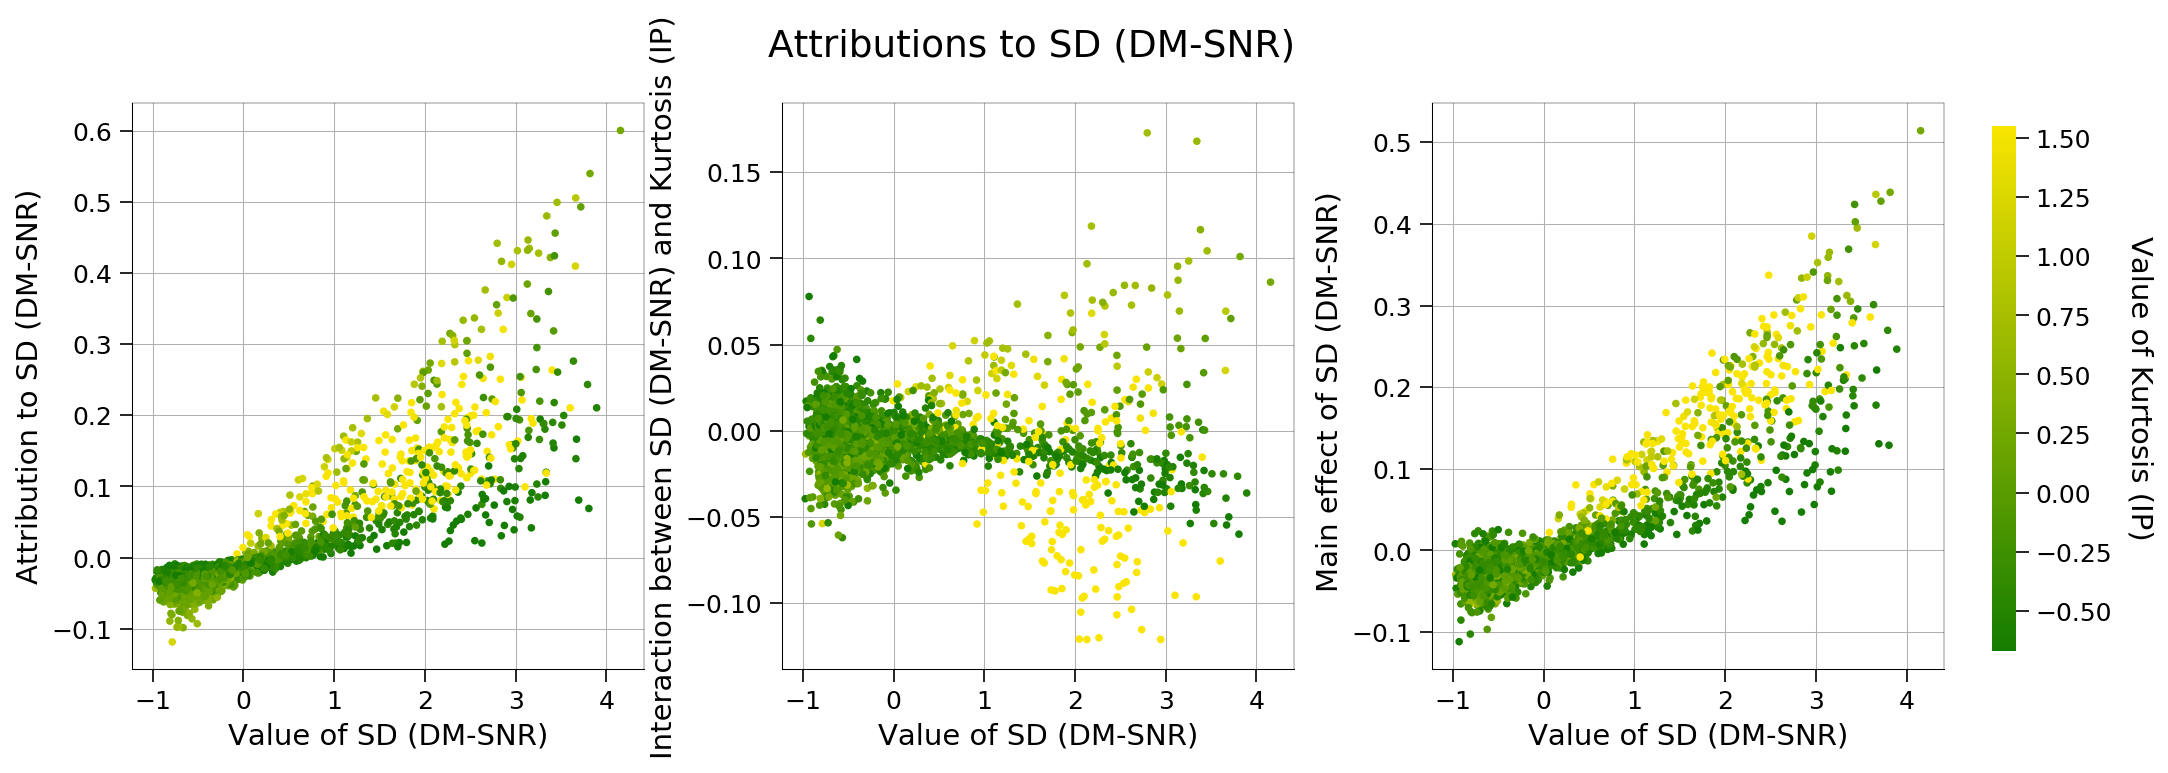

In [8]:
fig, axs = scatter_plot(attributions,
                        x_test,
                        feature_index='SD (DM-SNR)',
                        interactions=interactions,
                        color_by='Kurtosis (IP)',
                        feature_names=feature_names,
                        scale_y_ind=True)

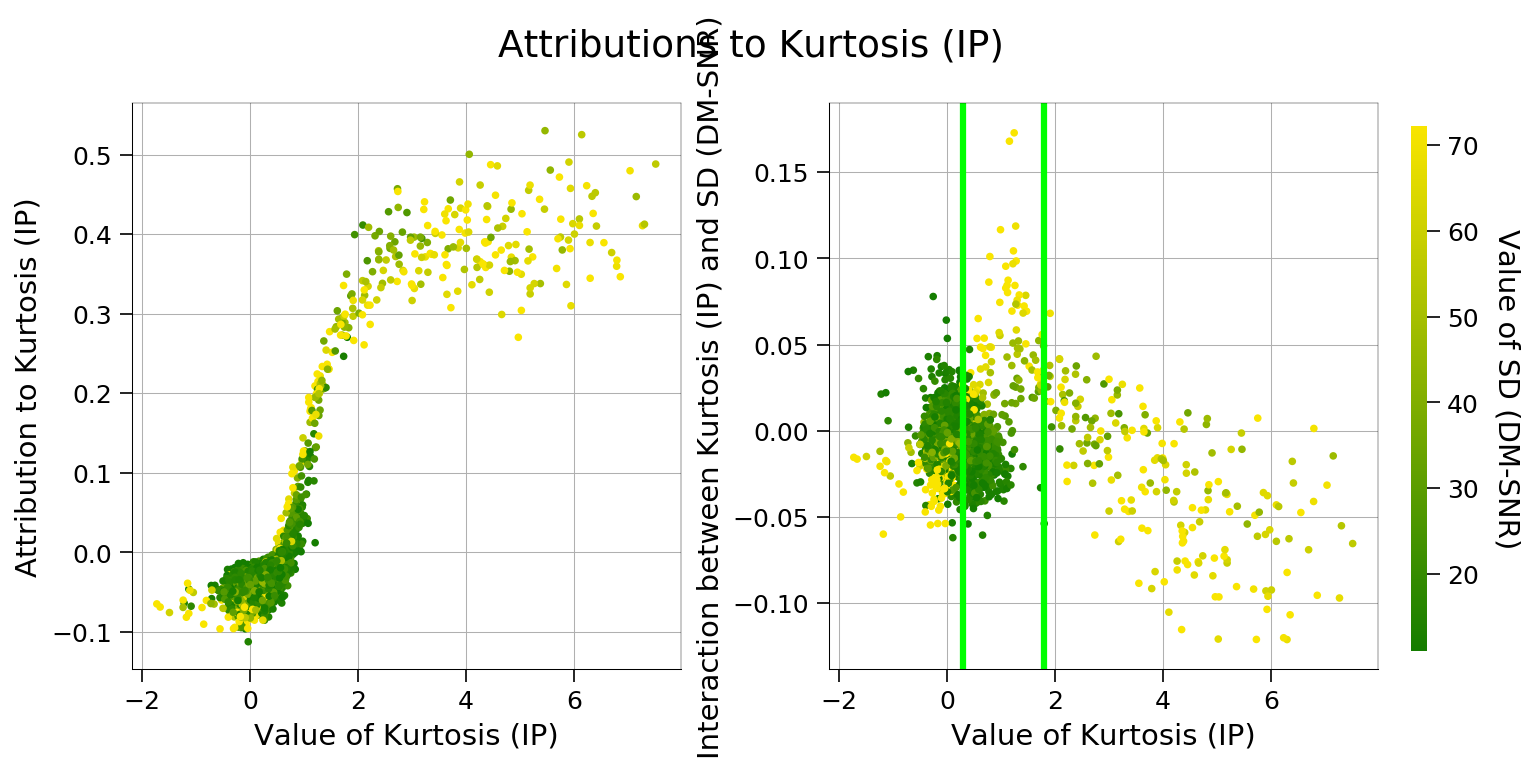

In [22]:
fig, axs = scatter_plot(attributions,
                        x_test_un.values,
                        feature_index='Kurtosis (IP)',
                        interactions=interactions,
                        color_by='SD (DM-SNR)',
                        feature_names=feature_names,
                        scale_y_ind=True,
                        plot_main=False)
ax = axs[1]
ax.axvline(0.3, c='lime', lw=3)
ax.axvline(1.8, c='lime', lw=3)
plt.savefig('kurtosis_and_sd.pdf')

In [10]:
def customize_axis(ax, xlabel, ylabel, title, ax_below=True):
    _set_axis_config(ax, [0.2, 0.2, 1.0, 1.0])
    ax.grid(linewidth=0.5)
    ax.set_axisbelow(ax_below)
    ax.tick_params(length=6, labelsize=12)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=18)

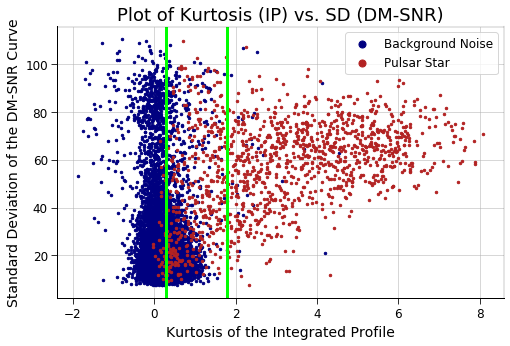

In [23]:
data = pd.DataFrame({
    'Kurtosis (IP)': x_train_un.values[:, kurtosis_profile_index],
    'SD (DM-SNR)': x_train_un.values[:, sd_dm_snr_index],
    'Label': y_train
})
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

for c in [0, 1]:
    select_data = data[data['Label'] == c]
    color = 'firebrick'
    label = 'Pulsar Star'
    if c == 0:
        color = 'navy'
        label = 'Background Noise'

    ax.scatter(x=select_data['Kurtosis (IP)'],
               y=select_data['SD (DM-SNR)'],
               c=color,
               s=6,
               label=label)

lgnd = ax.legend(prop={'size': 12})
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]

ax.axvline(0.3, c='lime', lw=3)
ax.axvline(1.8, c='lime', lw=3)
customize_axis(ax, xlabel='Kurtosis of the Integrated Profile', ylabel='Standard Deviation of the DM-SNR Curve', title='Plot of Kurtosis (IP) vs. SD (DM-SNR)')
plt.savefig('pulsar_data_points.pdf')

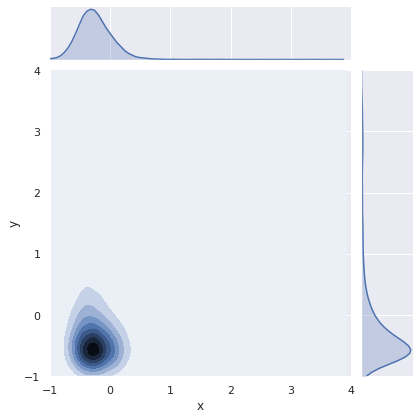

In [63]:
sns.jointplot(x='x', y='y', data=data[y_train==0], kind='kde', xlim=(-1, 4), ylim=(-1, 4))

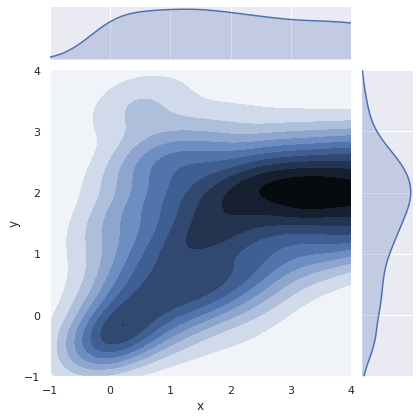

In [64]:
sns.jointplot(x='x', y='y', data=data[y_train==1], kind='kde', xlim=(-1, 4), ylim=(-1, 4))